In [1]:
# Import the modules
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import seaborn as sns
% matplotlib inline

In [2]:
filename = 'winequality-red.csv'  #Download the file from https://archive.ics.uci.edu/ml/datasets/wine+quality
df = pd.read_csv(filename, sep=';')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
#categorize wine quality
bins = (2,5.5,8)
categories = pd.cut(df['quality'], bins, labels = ['bad','good'])
df['quality'] = categories


In [4]:
df['quality'].value_counts()

good    855
bad     744
Name: quality, dtype: int64

In [5]:
#splitting data to X ve y
X = df.drop(['quality'], axis = 1)
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X)
y = df['quality']
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 323)

In [6]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
#Predicting the Test Set
y_pred = classifier.predict(X_test)

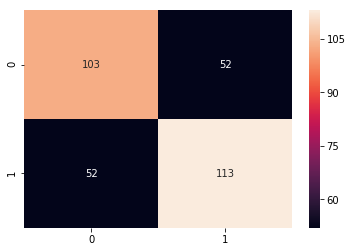

In [7]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [8]:
accuracies = cross_val_score(estimator = classifier, X = X_train,\
                             y = y_train, cv = 10)
print("Accuracy Mean {} Accuracy Variance {}".format(accuracies.mean(),accuracies.std()))

Accuracy Mean 0.7107344980314961 Accuracy Variance 0.018812075979578975


In [9]:
#Grid search for best model and parameters
from sklearn.model_selection import GridSearchCV
#parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
classifier = SVC()
parameters = [{'C': [1, 10], 'kernel': ['linear']},
              {'C': [1, 10], 'kernel': ['rbf'],
               'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
#here is the best accuracy
best_accuracy

0.73964034401876466

In [10]:
print(best_parameters)

{'kernel': 'linear', 'C': 1}


In [17]:
classifier = SVC(C = 1, kernel = 'linear', random_state = 323, gamma = 0.9)
classifier.fit(X_train, y_train)

#Predicting the Test Set
y_pred = classifier.predict(X_test)

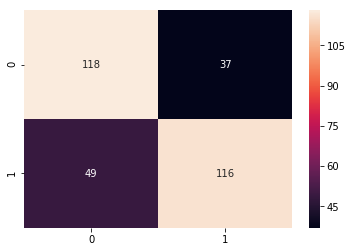

In [18]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [19]:
accuracies = cross_val_score(estimator = classifier, X = X_train,\
                             y = y_train, cv = 10)
print("Accuracy Mean {} Accuracy Variance {}".format(accuracies.mean(),accuracies.std()))

Accuracy Mean 0.7396222933070866 Accuracy Variance 0.03402727407384125
